# Image Classification Using Convolutional Neural Network (CNN)
    In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. 
    There are total 10 classes as shown below. We will use CNN for classification

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

### Load the dataset

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

##### Here we see there are 50000 training images and 1000 test images

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

#### y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

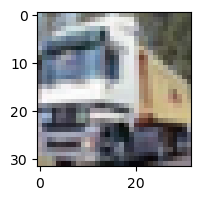

In [7]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

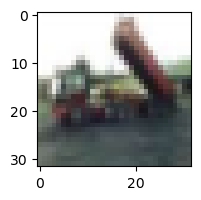

In [8]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[2])

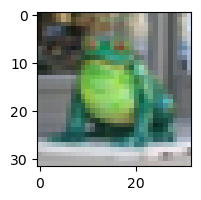

In [10]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[19])

In [11]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

    - it is a 2-d Array im converting into 1-d

In [12]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [13]:
y_test = y_test.reshape(-1,)

In [14]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [15]:
classes[9]

'truck'

##### Let's plot some images to see what they are

In [16]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

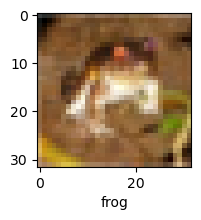

In [17]:
plot_sample(X_train, y_train, 0)

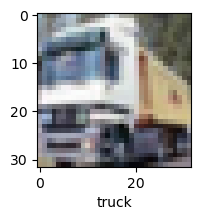

In [18]:
plot_sample(X_train, y_train, 1)

### Normalizing the training data

    Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [19]:
X_train = X_train / 255.0
X_test = X_test / 255.0

###    Build simple artificial neural network for image classification

In [20]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 164s 101ms/step - loss: 1.8106 - accuracy: 0.3537
Epoch 2/5
1563/1563 [==============================] - 150s 96ms/step - loss: 1.6225 - accuracy: 0.4266
Epoch 3/5
1563/1563 [==============================] - 182s 117ms/step - loss: 1.5430 - accuracy: 0.4554
Epoch 4/5
1563/1563 [==============================] - 196s 125ms/step - loss: 1.4804 - accuracy: 0.4788
Epoch 5/5
1563/1563 [==============================] - 169s 108ms/step - loss: 1.4337 - accuracy: 0.4939


In [22]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 6s 20ms/step - loss: 1.5499 - accuracy: 0.4430


[1.5499331951141357, 0.4429999887943268]

##### You can see that at the end of 5 epochs, accuracy is at around 49%

In [23]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 6s 19ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.60      0.56      1000
           1       0.53      0.70      0.60      1000
           2       0.35      0.38      0.37      1000
           3       0.43      0.10      0.17      1000
           4       0.54      0.17      0.26      1000
           5       0.34      0.42      0.38      1000
           6       0.67      0.24      0.35      1000
           7       0.30      0.82      0.43      1000
           8       0.68      0.55      0.60      1000
           9       0.64      0.44      0.52      1000

    accuracy                           0.44     10000
   macro avg       0.50      0.44      0.42     10000
weighted avg       0.50      0.44      0.42     10000



#### Now let us build a convolutional neural network to train our images

In [24]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [25]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 62s 36ms/step - loss: 1.4625 - accuracy: 0.4752
Epoch 2/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1149 - accuracy: 0.6084
Epoch 3/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9909 - accuracy: 0.6554
Epoch 4/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9026 - accuracy: 0.6862
Epoch 5/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.8376 - accuracy: 0.7090
Epoch 6/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7789 - accuracy: 0.7325
Epoch 7/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7361 - accuracy: 0.7457
Epoch 8/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6910 - accuracy: 0.7601
Epoch 9/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6580 - accuracy: 0.7709
Epoch 10/10
1563/1563 [==============================] - 57s 37m

###### With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [27]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.8957 - accuracy: 0.7040


[0.8956522345542908, 0.7039999961853027]

In [28]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 13ms/step


array([[3.3794485e-03, 2.5225570e-05, 2.4911743e-03, 9.6769798e-01,
        2.6090891e-04, 1.5792120e-02, 3.0391277e-03, 2.7710880e-04,
        6.6677649e-03, 3.6908625e-04],
       [2.4884794e-04, 2.9599681e-02, 4.7473529e-07, 8.4420201e-08,
        4.9835407e-09, 1.0932319e-09, 4.3955875e-08, 2.1204563e-09,
        9.6955240e-01, 5.9849280e-04],
       [2.7254772e-01, 4.1488178e-02, 1.6460832e-03, 3.2466513e-03,
        2.8842781e-03, 3.9577176e-04, 1.8147108e-04, 2.4737031e-03,
        6.0338062e-01, 7.1755469e-02],
       [9.2280799e-01, 7.0898584e-04, 3.0238525e-04, 2.9785195e-04,
        9.0580923e-04, 1.4349406e-06, 4.8227263e-05, 9.0837157e-06,
        7.4736007e-02, 1.8227060e-04],
       [1.7757523e-07, 4.1558496e-06, 6.9305231e-03, 1.0128108e-02,
        1.6789567e-01, 1.2868465e-04, 8.1486136e-01, 1.6937537e-06,
        4.8819667e-05, 8.3505904e-07]], dtype=float32)

In [29]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [30]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

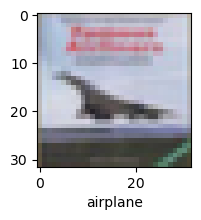

In [31]:
plot_sample(X_test, y_test,3)

In [32]:
classes[y_classes[3]]

'airplane'

In [33]:
classes[y_classes[3]]

'airplane'